## JAKUB

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os
import sys


In [3]:
# wczytanie pliku bazowego do analizy
df = pd.read_csv("workspace_table1.csv")
# print(type(df))
df.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,0,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008804,-1,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008804,-2,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,3,5008804,-3,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,4,5008804,-4,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [4]:
#analiza wystąpień danego STATUSU w całej bazie danych, liczba wierszy per konkretny status

df["STATUS"].value_counts()

C    274364
0    243034
X    122423
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [5]:
## Usunięcie kolumny "Unnamed"
df = df.drop("Unnamed: 0", axis=1)
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649739,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649740,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649741,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [6]:
# usnunięcie wierszy, które są X, stowrzenie nowej bazy, gdzie STATUS nie równa się == X
df1 = df[df.STATUS !="X"]

In [7]:
pd.set_option('float_format','{:.2f}'.format)

In [8]:
# sprawdzenie kolumn (w tym wypadku "AMT_INCOME_TOTAL") ogólnych miar - sprawdzenie outlierów, wartości odstających.

df1["AMT_INCOME_TOTAL"].describe()

count    527320.00
mean     195631.81
std      103859.72
min       27000.00
25%      135000.00
50%      180000.00
75%      225000.00
max     1575000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [9]:
# wyrównanie wyświetlania kolumn i nagłówków

pd.options.display.max_rows = 999

In [10]:
# sprawdzenie ilości wystąpień ilości wierszy w określonymi miesiącami 

df["MONTHS_BALANCE"].value_counts()

-1     20806
-2     20738
-3     20557
 0     20539
-4     20267
-5     19969
-6     19631
-7     19256
-8     18826
-9     18510
-10    18211
-11    17894
-12    17549
-13    17178
-14    16788
-15    16386
-16    16024
-17    15628
-18    15167
-19    14807
-20    14454
-21    14076
-22    13741
-23    13355
-24    12960
-25    12509
-26    12080
-27    11700
-28    11292
-29    10908
-30    10508
-31    10146
-32     9769
-33     9398
-34     9044
-35     8677
-36     8304
-37     7967
-38     7624
-39     7209
-40     6731
-41     6319
-42     5937
-43     5576
-44     5224
-45     4912
-46     4586
-47     4245
-48     3890
-49     3547
-50     3223
-51     2902
-52     2542
-53     2177
-54     1890
-55     1616
-56     1331
-57     1049
-58      808
-59      524
-60      262
Name: MONTHS_BALANCE, dtype: int64

In [11]:
# utowrzenie dla STATUSU dwóch grup 0 i 1, wykorzystując funkcję IS IN.
df1.loc[df['STATUS'].isin(['C','0','1']),'STATUS'] = '0'

C:\Users\OEM\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
# testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [13]:
# utowrzenie dla STATUS dwóch grup 0 i 1, wykorzystując funkcję IS IN
df1.loc[df['STATUS'].isin(['5','3','4','2']),'STATUS'] = '1'

In [14]:
#testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
1      2303
Name: STATUS, dtype: int64

In [15]:
# zmiana typu kolumny STATUS
df1["STATUS"] = df1["STATUS"].astype(int)

C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# usunięcie kolumny MONTH_BALANCE. Nie będzie ona nam dalej potrzebna, gdyż kolumna STATUS mówi nam czy 
#dany klient jest ok (STATUS==0) czy nie (STATUS==1)

df1 = df1.drop("MONTHS_BALANCE", axis=1)
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
3,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
4,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649739,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649740,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649741,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00


In [17]:
# wyliczenie STATUS dla danego klienta a następnie usunięcie duplikatów. Wszystko po to aby uzyskać unikatową wartość (czy jest ok czy nie)
# dla danego klienta

#%%time
i = 0
all_ids = len(df1["ID"].unique())
for ID in df1["ID"].unique():
    i += 1
    progress = i / all_ids
    if df1.loc[df1["ID"]== ID, "STATUS"].sum() > 0:
        df1.loc[df1["ID"]==ID, "STATUS"] = 1
    else:
        df1.loc[df1["ID"]==ID, "STATUS"] = 0
        
    if round(progress, 0) % 5 == 0:
        print(f'przeliczono {progress*100}% przypadkow')
df1.drop_duplicates(inplace=True)
df1.info()

przeliczono 0.0036405999708752% przypadkow
przeliczono 0.0072811999417504% przypadkow
przeliczono 0.010921799912625601% przypadkow
przeliczono 0.0145623998835008% przypadkow
przeliczono 0.018202999854376% przypadkow
przeliczono 0.021843599825251202% przypadkow
przeliczono 0.025484199796126403% przypadkow
przeliczono 0.0291247997670016% przypadkow
przeliczono 0.0327653997378768% przypadkow
przeliczono 0.036405999708752% przypadkow
przeliczono 0.040046599679627204% przypadkow
przeliczono 0.043687199650502405% przypadkow
przeliczono 0.047327799621377606% przypadkow
przeliczono 0.05096839959225281% przypadkow
przeliczono 0.054608999563128% przypadkow
przeliczono 0.0582495995340032% przypadkow
przeliczono 0.06189019950487841% przypadkow
przeliczono 0.0655307994757536% przypadkow
przeliczono 0.0691713994466288% przypadkow
przeliczono 0.072811999417504% przypadkow
przeliczono 0.0764525993883792% przypadkow
przeliczono 0.08009319935925441% przypadkow
przeliczono 0.08373379933012962% przypadkow

przeliczono 0.7499635940002912% przypadkow
przeliczono 0.7536041939711665% przypadkow
przeliczono 0.7572447939420417% przypadkow
przeliczono 0.7608853939129168% przypadkow
przeliczono 0.764525993883792% przypadkow
przeliczono 0.7681665938546672% przypadkow
przeliczono 0.7718071938255424% przypadkow
przeliczono 0.7754477937964177% przypadkow
przeliczono 0.7790883937672928% przypadkow
przeliczono 0.7827289937381681% przypadkow
przeliczono 0.7863695937090431% przypadkow
przeliczono 0.7900101936799184% przypadkow
przeliczono 0.7936507936507936% przypadkow
przeliczono 0.7972913936216689% przypadkow
przeliczono 0.8009319935925441% przypadkow
przeliczono 0.8045725935634191% przypadkow
przeliczono 0.8082131935342944% przypadkow
przeliczono 0.8118537935051696% przypadkow
przeliczono 0.8154943934760449% przypadkow
przeliczono 0.8191349934469201% przypadkow
przeliczono 0.8227755934177952% przypadkow
przeliczono 0.8264161933886705% przypadkow
przeliczono 0.8300567933595456% przypadkow
przeliczono 

przeliczono 1.489005388087957% przypadkow
przeliczono 1.492645988058832% przypadkow
przeliczono 1.4962865880297074% przypadkow
przeliczono 1.4999271880005824% przypadkow
przeliczono 1.5035677879714577% przypadkow
przeliczono 1.507208387942333% przypadkow
przeliczono 1.510848987913208% przypadkow
przeliczono 1.5144895878840834% przypadkow
przeliczono 1.5181301878549585% przypadkow
przeliczono 1.5217707878258335% przypadkow
przeliczono 1.525411387796709% przypadkow
przeliczono 1.529051987767584% przypadkow
przeliczono 1.5326925877384594% przypadkow
przeliczono 1.5363331877093345% przypadkow
przeliczono 1.5399737876802095% przypadkow
przeliczono 1.5436143876510848% przypadkow
przeliczono 1.5472549876219601% przypadkow
przeliczono 1.5508955875928354% przypadkow
przeliczono 1.5545361875637105% przypadkow
przeliczono 1.5581767875345856% przypadkow
przeliczono 1.5618173875054608% przypadkow
przeliczono 1.5654579874763361% przypadkow
przeliczono 1.5690985874472114% przypadkow
przeliczono 1.572

przeliczono 2.253531381971749% przypadkow
przeliczono 2.257171981942624% przypadkow
przeliczono 2.260812581913499% przypadkow
przeliczono 2.2644531818843747% przypadkow
przeliczono 2.26809378185525% przypadkow
przeliczono 2.271734381826125% przypadkow
przeliczono 2.275374981797% przypadkow
przeliczono 2.2790155817678754% przypadkow
przeliczono 2.2826561817387505% przypadkow
przeliczono 2.2862967817096256% przypadkow
przeliczono 2.289937381680501% przypadkow
przeliczono 2.293577981651376% przypadkow
przeliczono 2.2972185816222512% przypadkow
przeliczono 2.3008591815931267% przypadkow
przeliczono 2.304499781564002% przypadkow
przeliczono 2.308140381534877% przypadkow
przeliczono 2.311780981505752% przypadkow
przeliczono 2.3154215814766275% przypadkow
przeliczono 2.3190621814475025% przypadkow
przeliczono 2.3227027814183776% przypadkow
przeliczono 2.326343381389253% przypadkow
przeliczono 2.329983981360128% przypadkow
przeliczono 2.3336245813310033% przypadkow
przeliczono 2.33726518130187

przeliczono 3.021697975826416% przypadkow
przeliczono 3.0253385757972913% przypadkow
przeliczono 3.0289791757681668% przypadkow
przeliczono 3.032619775739042% przypadkow
przeliczono 3.036260375709917% przypadkow
przeliczono 3.0399009756807924% przypadkow
przeliczono 3.043541575651667% przypadkow
przeliczono 3.0471821756225426% przypadkow
przeliczono 3.050822775593418% przypadkow
przeliczono 3.0544633755642927% przypadkow
przeliczono 3.058103975535168% przypadkow
przeliczono 3.0617445755060433% przypadkow
przeliczono 3.065385175476919% przypadkow
przeliczono 3.069025775447794% przypadkow
przeliczono 3.072666375418669% przypadkow
przeliczono 3.0763069753895445% przypadkow
przeliczono 3.079947575360419% przypadkow
przeliczono 3.0835881753312946% przypadkow
przeliczono 3.0872287753021697% przypadkow
przeliczono 3.0908693752730447% przypadkow
przeliczono 3.0945099752439202% przypadkow
przeliczono 3.0981505752147953% przypadkow
przeliczono 3.101791175185671% przypadkow
przeliczono 3.10543177

przeliczono 3.768020969855832% przypadkow
przeliczono 3.771661569826707% przypadkow
przeliczono 3.7753021697975826% przypadkow
przeliczono 3.7789427697684577% przypadkow
przeliczono 3.782583369739333% przypadkow
przeliczono 3.7862239697102082% przypadkow
przeliczono 3.7898645696810833% przypadkow
przeliczono 3.793505169651959% przypadkow
przeliczono 3.797145769622834% przypadkow
przeliczono 3.800786369593709% przypadkow
przeliczono 3.8044269695645845% przypadkow
przeliczono 3.8080675695354596% przypadkow
przeliczono 3.8117081695063346% przypadkow
przeliczono 3.81534876947721% przypadkow
przeliczono 3.818989369448085% przypadkow
przeliczono 3.82262996941896% przypadkow
przeliczono 3.826270569389836% przypadkow
przeliczono 3.8299111693607104% przypadkow
przeliczono 3.8335517693315855% przypadkow
przeliczono 3.8371923693024614% przypadkow
przeliczono 3.840832969273336% przypadkow
przeliczono 3.844473569244211% przypadkow
przeliczono 3.8481141692150866% przypadkow
przeliczono 3.85175476918

przeliczono 4.554390563564875% przypadkow
przeliczono 4.558031163535751% przypadkow
przeliczono 4.5616717635066255% przypadkow
przeliczono 4.565312363477501% przypadkow
przeliczono 4.5689529634483765% przypadkow
przeliczono 4.572593563419251% przypadkow
przeliczono 4.576234163390127% przypadkow
przeliczono 4.579874763361002% przypadkow
przeliczono 4.583515363331877% przypadkow
przeliczono 4.587155963302752% przypadkow
przeliczono 4.590796563273628% przypadkow
przeliczono 4.5944371632445025% przypadkow
przeliczono 4.598077763215378% przypadkow
przeliczono 4.6017183631862535% przypadkow
przeliczono 4.605358963157128% przypadkow
przeliczono 4.608999563128004% przypadkow
przeliczono 4.612640163098878% przypadkow
przeliczono 4.616280763069754% przypadkow
przeliczono 4.619921363040629% przypadkow
przeliczono 4.623561963011504% przypadkow
przeliczono 4.627202562982379% przypadkow
przeliczono 4.630843162953255% przypadkow
przeliczono 4.63448376292413% przypadkow
przeliczono 4.638124362895005% 

przeliczono 5.318916557448667% przypadkow
przeliczono 5.322557157419543% przypadkow
przeliczono 5.326197757390418% przypadkow
przeliczono 5.329838357361293% przypadkow
przeliczono 5.333478957332169% przypadkow
przeliczono 5.337119557303044% przypadkow
przeliczono 5.340760157273919% przypadkow
przeliczono 5.344400757244793% przypadkow
przeliczono 5.34804135721567% przypadkow
przeliczono 5.351681957186544% przypadkow
przeliczono 5.355322557157419% przypadkow
przeliczono 5.358963157128295% przypadkow
przeliczono 5.36260375709917% przypadkow
przeliczono 5.366244357070045% przypadkow
przeliczono 5.36988495704092% przypadkow
przeliczono 5.373525557011796% przypadkow
przeliczono 5.37716615698267% przypadkow
przeliczono 5.380806756953546% przypadkow
przeliczono 5.384447356924421% przypadkow
przeliczono 5.388087956895296% przypadkow
przeliczono 5.3917285568661715% przypadkow
przeliczono 5.395369156837047% przypadkow
przeliczono 5.399009756807922% przypadkow
przeliczono 5.402650356778797% przypa

przeliczono 6.094364351245085% przypadkow
przeliczono 6.09800495121596% przypadkow
przeliczono 6.101645551186836% przypadkow
przeliczono 6.105286151157711% przypadkow
przeliczono 6.108926751128585% przypadkow
przeliczono 6.112567351099461% przypadkow
przeliczono 6.116207951070336% przypadkow
przeliczono 6.119848551041212% przypadkow
przeliczono 6.123489151012087% przypadkow
przeliczono 6.127129750982962% przypadkow
przeliczono 6.130770350953838% przypadkow
przeliczono 6.134410950924712% przypadkow
przeliczono 6.138051550895588% przypadkow
przeliczono 6.141692150866463% przypadkow
przeliczono 6.145332750837338% przypadkow
przeliczono 6.148973350808213% przypadkow
przeliczono 6.152613950779089% przypadkow
przeliczono 6.1562545507499635% przypadkow
przeliczono 6.159895150720838% przypadkow
przeliczono 6.1635357506917146% przypadkow
przeliczono 6.167176350662589% przypadkow
przeliczono 6.170816950633464% przypadkow
przeliczono 6.174457550604339% przypadkow
przeliczono 6.178098150575215% pr

przeliczono 6.866171545070627% przypadkow
przeliczono 6.869812145041503% przypadkow
przeliczono 6.8734527450123775% przypadkow
przeliczono 6.877093344983254% przypadkow
przeliczono 6.8807339449541285% przypadkow
przeliczono 6.884374544925004% przypadkow
przeliczono 6.888015144895879% przypadkow
przeliczono 6.891655744866753% przypadkow
przeliczono 6.895296344837629% przypadkow
przeliczono 6.898936944808505% przypadkow
przeliczono 6.90257754477938% przypadkow
przeliczono 6.906218144750255% przypadkow
przeliczono 6.90985874472113% przypadkow
przeliczono 6.9134993446920046% przypadkow
przeliczono 6.91713994466288% przypadkow
przeliczono 6.9207805446337565% przypadkow
przeliczono 6.924421144604631% przypadkow
przeliczono 6.928061744575506% przypadkow
przeliczono 6.931702344546381% przypadkow
przeliczono 6.935342944517256% przypadkow
przeliczono 6.938983544488132% przypadkow
przeliczono 6.942624144459007% przypadkow
przeliczono 6.946264744429882% przypadkow
przeliczono 6.949905344400757% pr

przeliczono 7.63069753895442% przypadkow
przeliczono 7.634338138925295% przypadkow
przeliczono 7.63797873889617% przypadkow
przeliczono 7.641619338867045% przypadkow
przeliczono 7.64525993883792% przypadkow
przeliczono 7.648900538808796% przypadkow
przeliczono 7.652541138779672% przypadkow
przeliczono 7.656181738750546% przypadkow
przeliczono 7.659822338721421% przypadkow
przeliczono 7.663462938692296% przypadkow
przeliczono 7.667103538663171% przypadkow
przeliczono 7.670744138634047% przypadkow
przeliczono 7.674384738604923% przypadkow
przeliczono 7.6780253385757975% przypadkow
przeliczono 7.681665938546672% przypadkow
przeliczono 7.685306538517548% przypadkow
przeliczono 7.688947138488422% przypadkow
przeliczono 7.692587738459299% przypadkow
przeliczono 7.696228338430173% przypadkow
przeliczono 7.699868938401049% przypadkow
przeliczono 7.703509538371923% przypadkow
przeliczono 7.707150138342798% przypadkow
przeliczono 7.7107907383136745% przypadkow
przeliczono 7.71443133828455% przyp

przeliczono 8.398864132809086% przypadkow
przeliczono 8.402504732779963% przypadkow
przeliczono 8.406145332750837% przypadkow
przeliczono 8.409785932721713% przypadkow
przeliczono 8.413426532692588% przypadkow
przeliczono 8.417067132663462% przypadkow
przeliczono 8.42070773263434% przypadkow
przeliczono 8.424348332605213% przypadkow
przeliczono 8.427988932576088% przypadkow
przeliczono 8.431629532546964% przypadkow
przeliczono 8.43527013251784% przypadkow
przeliczono 8.438910732488713% przypadkow
przeliczono 8.44255133245959% przypadkow
przeliczono 8.446191932430464% przypadkow
przeliczono 8.44983253240134% przypadkow
przeliczono 8.453473132372215% przypadkow
przeliczono 8.457113732343089% przypadkow
przeliczono 8.460754332313964% przypadkow
przeliczono 8.464394932284842% przypadkow
przeliczono 8.468035532255715% przypadkow
przeliczono 8.471676132226591% przypadkow
przeliczono 8.475316732197467% przypadkow
przeliczono 8.47895733216834% przypadkow
przeliczono 8.482597932139216% przypadk

przeliczono 9.167030726663754% przypadkow
przeliczono 9.17067132663463% przypadkow
przeliczono 9.174311926605505% przypadkow
przeliczono 9.17795252657638% przypadkow
przeliczono 9.181593126547256% przypadkow
przeliczono 9.18523372651813% przypadkow
przeliczono 9.188874326489005% przypadkow
przeliczono 9.19251492645988% przypadkow
przeliczono 9.196155526430756% przypadkow
przeliczono 9.199796126401631% przypadkow
przeliczono 9.203436726372507% przypadkow
przeliczono 9.20707732634338% przypadkow
przeliczono 9.210717926314256% przypadkow
przeliczono 9.214358526285132% przypadkow
przeliczono 9.217999126256007% przypadkow
przeliczono 9.221639726226883% przypadkow
przeliczono 9.225280326197757% przypadkow
przeliczono 9.228920926168632% przypadkow
przeliczono 9.232561526139508% przypadkow
przeliczono 9.236202126110383% przypadkow
przeliczono 9.239842726081259% przypadkow
przeliczono 9.243483326052134% przypadkow
przeliczono 9.247123926023008% przypadkow
przeliczono 9.250764525993883% przypadk

przeliczono 9.946119120431048% przypadkow
przeliczono 9.949759720401923% przypadkow
przeliczono 9.953400320372797% przypadkow
przeliczono 9.957040920343672% przypadkow
przeliczono 9.960681520314548% przypadkow
przeliczono 9.964322120285422% przypadkow
przeliczono 9.967962720256299% przypadkow
przeliczono 9.971603320227175% przypadkow
przeliczono 9.975243920198048% przypadkow
przeliczono 9.978884520168924% przypadkow
przeliczono 9.9825251201398% przypadkow
przeliczono 9.986165720110675% przypadkow
przeliczono 9.98980632008155% przypadkow
przeliczono 9.993446920052424% przypadkow
przeliczono 9.9970875200233% przypadkow
przeliczono 10.000728119994175% przypadkow
przeliczono 10.004368719965049% przypadkow
przeliczono 10.008009319935926% przypadkow
przeliczono 10.011649919906802% przypadkow
przeliczono 10.015290519877675% przypadkow
przeliczono 10.018931119848551% przypadkow
przeliczono 10.022571719819426% przypadkow
przeliczono 10.0262123197903% przypadkow
przeliczono 10.029852919761177% p

przeliczono 10.707004514343964% przypadkow
przeliczono 10.710645114314838% przypadkow
przeliczono 10.714285714285714% przypadkow
przeliczono 10.71792631425659% przypadkow
przeliczono 10.721566914227465% przypadkow
przeliczono 10.72520751419834% przypadkow
przeliczono 10.728848114169216% przypadkow
przeliczono 10.73248871414009% przypadkow
przeliczono 10.736129314110965% przypadkow
przeliczono 10.73976991408184% przypadkow
przeliczono 10.743410514052716% przypadkow
przeliczono 10.747051114023591% przypadkow
przeliczono 10.750691713994467% przypadkow
przeliczono 10.75433231396534% przypadkow
przeliczono 10.757972913936218% przypadkow
przeliczono 10.761613513907092% przypadkow
przeliczono 10.765254113877967% przypadkow
przeliczono 10.768894713848843% przypadkow
przeliczono 10.772535313819716% przypadkow
przeliczono 10.776175913790592% przypadkow
przeliczono 10.77981651376147% przypadkow
przeliczono 10.783457113732343% przypadkow
przeliczono 10.787097713703218% przypadkow
przeliczono 10.79

przeliczono 11.478811708169506% przypadkow
przeliczono 11.482452308140381% przypadkow
przeliczono 11.486092908111257% przypadkow
przeliczono 11.489733508082132% przypadkow
przeliczono 11.493374108053008% przypadkow
przeliczono 11.497014708023883% przypadkow
przeliczono 11.500655307994757% przypadkow
przeliczono 11.504295907965632% przypadkow
przeliczono 11.507936507936508% przypadkow
przeliczono 11.511577107907383% przypadkow
przeliczono 11.515217707878259% przypadkow
przeliczono 11.518858307849133% przypadkow
przeliczono 11.522498907820008% przypadkow
przeliczono 11.526139507790884% przypadkow
przeliczono 11.52978010776176% przypadkow
przeliczono 11.533420707732635% przypadkow
przeliczono 11.53706130770351% przypadkow
przeliczono 11.540701907674384% przypadkow
przeliczono 11.54434250764526% przypadkow
przeliczono 11.547983107616135% przypadkow
przeliczono 11.55162370758701% przypadkow
przeliczono 11.555264307557886% przypadkow
przeliczono 11.558904907528762% przypadkow
przeliczono 11.

przeliczono 12.2433377020533% przypadkow
przeliczono 12.246978302024173% przypadkow
przeliczono 12.250618901995049% przypadkow
przeliczono 12.254259501965924% przypadkow
przeliczono 12.257900101936798% przypadkow
przeliczono 12.261540701907675% przypadkow
przeliczono 12.26518130187855% przypadkow
przeliczono 12.268821901849424% przypadkow
przeliczono 12.2724625018203% przypadkow
przeliczono 12.276103101791175% przypadkow
przeliczono 12.27974370176205% przypadkow
przeliczono 12.283384301732927% przypadkow
przeliczono 12.2870249017038% przypadkow
przeliczono 12.290665501674676% przypadkow
przeliczono 12.294306101645551% przypadkow
przeliczono 12.297946701616427% przypadkow
przeliczono 12.3015873015873% przypadkow
przeliczono 12.305227901558178% przypadkow
przeliczono 12.308868501529052% przypadkow
przeliczono 12.312509101499927% przypadkow
przeliczono 12.316149701470803% przypadkow
przeliczono 12.319790301441676% przypadkow
przeliczono 12.323430901412554% przypadkow
przeliczono 12.327071

przeliczono 13.011504295907967% przypadkow
przeliczono 13.01514489587884% przypadkow
przeliczono 13.018785495849716% przypadkow
przeliczono 13.022426095820592% przypadkow
przeliczono 13.026066695791465% przypadkow
przeliczono 13.029707295762341% przypadkow
przeliczono 13.033347895733217% przypadkow
przeliczono 13.03698849570409% przypadkow
przeliczono 13.040629095674966% przypadkow
przeliczono 13.044269695645843% przypadkow
przeliczono 13.047910295616719% przypadkow
przeliczono 13.051550895587594% przypadkow
przeliczono 13.055191495558468% przypadkow
przeliczono 13.058832095529343% przypadkow
przeliczono 13.062472695500219% przypadkow
przeliczono 13.066113295471094% przypadkow
przeliczono 13.069753895441968% przypadkow
przeliczono 13.073394495412844% przypadkow
przeliczono 13.077035095383719% przypadkow
przeliczono 13.080675695354593% przypadkow
przeliczono 13.084316295325472% przypadkow
przeliczono 13.087956895296346% przypadkow
przeliczono 13.091597495267221% przypadkow
przeliczono 1

przeliczono 13.779670889762633% przypadkow
przeliczono 13.783311489733507% przypadkow
przeliczono 13.786952089704382% przypadkow
przeliczono 13.790592689675258% przypadkow
przeliczono 13.794233289646135% przypadkow
przeliczono 13.79787388961701% przypadkow
przeliczono 13.801514489587884% przypadkow
przeliczono 13.80515508955876% przypadkow
przeliczono 13.808795689529635% przypadkow
przeliczono 13.81243628950051% przypadkow
przeliczono 13.816076889471384% przypadkow
przeliczono 13.81971748944226% przypadkow
przeliczono 13.823358089413135% przypadkow
przeliczono 13.826998689384009% przypadkow
przeliczono 13.830639289354885% przypadkow
przeliczono 13.83427988932576% przypadkow
przeliczono 13.837920489296637% przypadkow
przeliczono 13.841561089267513% przypadkow
przeliczono 13.845201689238387% przypadkow
przeliczono 13.848842289209262% przypadkow
przeliczono 13.852482889180138% przypadkow
przeliczono 13.856123489151011% przypadkow
przeliczono 13.859764089121887% przypadkow
przeliczono 13.8

przeliczono 14.544196883646423% przypadkow
przeliczono 14.547837483617302% przypadkow
przeliczono 14.551478083588176% przypadkow
przeliczono 14.555118683559051% przypadkow
przeliczono 14.558759283529927% przypadkow
przeliczono 14.5623998835008% przypadkow
przeliczono 14.566040483471676% przypadkow
przeliczono 14.569681083442552% przypadkow
przeliczono 14.573321683413425% przypadkow
przeliczono 14.576962283384301% przypadkow
przeliczono 14.580602883355176% przypadkow
przeliczono 14.58424348332605% przypadkow
przeliczono 14.58788408329693% przypadkow
przeliczono 14.591524683267803% przypadkow
przeliczono 14.595165283238678% przypadkow
przeliczono 14.598805883209554% przypadkow
przeliczono 14.602446483180428% przypadkow
przeliczono 14.606087083151303% przypadkow
przeliczono 14.609727683122179% przypadkow
przeliczono 14.613368283093052% przypadkow
przeliczono 14.617008883063928% przypadkow
przeliczono 14.620649483034803% przypadkow
przeliczono 14.624290083005679% przypadkow
przeliczono 14.

przeliczono 15.308722877530217% przypadkow
przeliczono 15.312363477501092% przypadkow
przeliczono 15.316004077471968% przypadkow
przeliczono 15.319644677442842% przypadkow
przeliczono 15.323285277413717% przypadkow
przeliczono 15.326925877384593% przypadkow
przeliczono 15.330566477355468% przypadkow
przeliczono 15.334207077326342% przypadkow
przeliczono 15.337847677297217% przypadkow
przeliczono 15.341488277268095% przypadkow
przeliczono 15.34512887723897% przypadkow
przeliczono 15.348769477209846% przypadkow
przeliczono 15.35241007718072% przypadkow
przeliczono 15.356050677151595% przypadkow
przeliczono 15.35969127712247% przypadkow
przeliczono 15.363331877093344% przypadkow
przeliczono 15.36697247706422% przypadkow
przeliczono 15.370613077035095% przypadkow
przeliczono 15.374253677005969% przypadkow
przeliczono 15.377894276976845% przypadkow
przeliczono 15.381534876947722% przypadkow
przeliczono 15.385175476918597% przypadkow
przeliczono 15.388816076889473% przypadkow
przeliczono 15.

przeliczono 16.076889471384884% przypadkow
przeliczono 16.08053007135576% przypadkow
przeliczono 16.084170671326632% przypadkow
przeliczono 16.087811271297507% przypadkow
przeliczono 16.091451871268386% przypadkow
przeliczono 16.095092471239262% przypadkow
przeliczono 16.098733071210138% przypadkow
przeliczono 16.10237367118101% przypadkow
przeliczono 16.106014271151885% przypadkow
przeliczono 16.10965487112276% przypadkow
przeliczono 16.113295471093636% przypadkow
przeliczono 16.11693607106451% przypadkow
przeliczono 16.120576671035387% przypadkow
przeliczono 16.124217271006263% przypadkow
przeliczono 16.127857870977135% przypadkow
przeliczono 16.131498470948014% przypadkow
przeliczono 16.13513907091889% przypadkow
przeliczono 16.138779670889765% przypadkow
przeliczono 16.14242027086064% przypadkow
przeliczono 16.146060870831512% przypadkow
przeliczono 16.149701470802388% przypadkow
przeliczono 16.153342070773263% przypadkow
przeliczono 16.15698267074414% przypadkow
przeliczono 16.160

przeliczono 16.84141546526868% przypadkow
przeliczono 16.845056065239554% przypadkow
przeliczono 16.848696665210426% przypadkow
przeliczono 16.8523372651813% przypadkow
przeliczono 16.855977865152177% przypadkow
przeliczono 16.859618465123052% przypadkow
przeliczono 16.863259065093928% przypadkow
przeliczono 16.866899665064803% przypadkow
przeliczono 16.87054026503568% przypadkow
przeliczono 16.87418086500655% przypadkow
przeliczono 16.877821464977426% przypadkow
przeliczono 16.881462064948302% przypadkow
przeliczono 16.88510266491918% przypadkow
przeliczono 16.888743264890056% przypadkow
przeliczono 16.89238386486093% przypadkow
przeliczono 16.896024464831804% przypadkow
przeliczono 16.89966506480268% przypadkow
przeliczono 16.903305664773555% przypadkow
przeliczono 16.90694626474443% przypadkow
przeliczono 16.910586864715306% przypadkow
przeliczono 16.914227464686178% przypadkow
przeliczono 16.917868064657053% przypadkow
przeliczono 16.92150866462793% przypadkow
przeliczono 16.925149

przeliczono 17.61322265909422% przypadkow
przeliczono 17.616863259065095% przypadkow
przeliczono 17.620503859035967% przypadkow
przeliczono 17.624144459006843% przypadkow
przeliczono 17.627785058977718% przypadkow
przeliczono 17.631425658948594% przypadkow
przeliczono 17.635066258919473% przypadkow
przeliczono 17.638706858890345% przypadkow
przeliczono 17.64234745886122% przypadkow
przeliczono 17.645988058832096% przypadkow
przeliczono 17.64962865880297% przypadkow
przeliczono 17.653269258773847% przypadkow
przeliczono 17.656909858744722% przypadkow
przeliczono 17.660550458715598% przypadkow
przeliczono 17.66419105868647% przypadkow
przeliczono 17.667831658657345% przypadkow
przeliczono 17.67147225862822% przypadkow
przeliczono 17.675112858599096% przypadkow
przeliczono 17.67875345856997% przypadkow
przeliczono 17.682394058540847% przypadkow
przeliczono 17.686034658511723% przypadkow
przeliczono 17.6896752584826% przypadkow
przeliczono 17.693315858453474% przypadkow
przeliczono 17.6969

przeliczono 18.406873452745014% przypadkow
przeliczono 18.410514052715886% przypadkow
przeliczono 18.41415465268676% przypadkow
przeliczono 18.417795252657637% przypadkow
przeliczono 18.421435852628512% przypadkow
przeliczono 18.425076452599388% przypadkow
przeliczono 18.428717052570263% przypadkow
przeliczono 18.43235765254114% przypadkow
przeliczono 18.435998252512015% przypadkow
przeliczono 18.43963885248289% przypadkow
przeliczono 18.443279452453766% przypadkow
przeliczono 18.44692005242464% przypadkow
przeliczono 18.450560652395513% przypadkow
przeliczono 18.45420125236639% przypadkow
przeliczono 18.457841852337264% przypadkow
przeliczono 18.46148245230814% przypadkow
przeliczono 18.465123052279015% przypadkow
przeliczono 18.46876365224989% przypadkow
przeliczono 18.472404252220766% przypadkow
przeliczono 18.47604485219164% przypadkow
przeliczono 18.479685452162517% przypadkow
przeliczono 18.483326052133393% przypadkow
przeliczono 18.486966652104268% przypadkow
przeliczono 18.4906

przeliczono 19.171399446628804% przypadkow
przeliczono 19.17504004659968% przypadkow
przeliczono 19.178680646570555% przypadkow
przeliczono 19.18232124654143% przypadkow
przeliczono 19.185961846512306% przypadkow
przeliczono 19.189602446483182% przypadkow
przeliczono 19.193243046454057% przypadkow
przeliczono 19.19688364642493% przypadkow
przeliczono 19.200524246395805% przypadkow
przeliczono 19.20416484636668% przypadkow
przeliczono 19.207805446337556% przypadkow
przeliczono 19.21144604630843% przypadkow
przeliczono 19.215086646279307% przypadkow
przeliczono 19.218727246250182% przypadkow
przeliczono 19.222367846221058% przypadkow
przeliczono 19.226008446191933% przypadkow
przeliczono 19.22964904616281% przypadkow
przeliczono 19.233289646133684% przypadkow
przeliczono 19.23693024610456% przypadkow
przeliczono 19.240570846075432% przypadkow
przeliczono 19.244211446046307% przypadkow
przeliczono 19.247852046017183% przypadkow
przeliczono 19.25149264598806% przypadkow
przeliczono 19.2551

przeliczono 19.957769040337848% przypadkow
przeliczono 19.961409640308723% przypadkow
przeliczono 19.9650502402796% przypadkow
przeliczono 19.96869084025047% przypadkow
przeliczono 19.97233144022135% przypadkow
przeliczono 19.975972040192225% przypadkow
przeliczono 19.9796126401631% przypadkow
przeliczono 19.983253240133976% przypadkow
przeliczono 19.986893840104848% przypadkow
przeliczono 19.990534440075724% przypadkow
przeliczono 19.9941750400466% przypadkow
przeliczono 19.997815640017475% przypadkow
przeliczono 20.00145623998835% przypadkow
przeliczono 20.005096839959226% przypadkow
przeliczono 20.008737439930098% przypadkow
przeliczono 20.012378039900973% przypadkow
przeliczono 20.016018639871852% przypadkow
przeliczono 20.019659239842728% przypadkow
przeliczono 20.023299839813603% przypadkow
przeliczono 20.026940439784475% przypadkow
przeliczono 20.03058103975535% przypadkow
przeliczono 20.034221639726226% przypadkow
przeliczono 20.037862239697102% przypadkow
przeliczono 20.041502

przeliczono 20.73685743410514% przypadkow
przeliczono 20.740498034076015% przypadkow
przeliczono 20.74413863404689% przypadkow
przeliczono 20.747779234017766% przypadkow
przeliczono 20.751419833988642% przypadkow
przeliczono 20.755060433959514% przypadkow
przeliczono 20.75870103393039% przypadkow
przeliczono 20.762341633901265% przypadkow
przeliczono 20.765982233872144% przypadkow
przeliczono 20.76962283384302% przypadkow
przeliczono 20.773263433813895% przypadkow
przeliczono 20.776904033784767% przypadkow
przeliczono 20.780544633755643% przypadkow
przeliczono 20.784185233726518% przypadkow
przeliczono 20.787825833697394% przypadkow
przeliczono 20.79146643366827% przypadkow
przeliczono 20.795107033639145% przypadkow
przeliczono 20.798747633610017% przypadkow
przeliczono 20.802388233580892% przypadkow
przeliczono 20.80602883355177% przypadkow
przeliczono 20.809669433522647% przypadkow
przeliczono 20.813310033493522% przypadkow
przeliczono 20.816950633464394% przypadkow
przeliczono 20.82

przeliczono 21.50866462793068% przypadkow
przeliczono 21.512305227901557% przypadkow
przeliczono 21.515945827872436% przypadkow
przeliczono 21.51958642784331% przypadkow
przeliczono 21.523227027814183% przypadkow
przeliczono 21.52686762778506% przypadkow
przeliczono 21.530508227755934% przypadkow
przeliczono 21.53414882772681% przypadkow
przeliczono 21.537789427697685% przypadkow
przeliczono 21.54143002766856% przypadkow
przeliczono 21.545070627639433% przypadkow
przeliczono 21.54871122761031% przypadkow
przeliczono 21.552351827581184% przypadkow
przeliczono 21.55599242755206% przypadkow
przeliczono 21.55963302752294% przypadkow
przeliczono 21.56327362749381% przypadkow
przeliczono 21.566914227464686% przypadkow
przeliczono 21.57055482743556% przypadkow
przeliczono 21.574195427406437% przypadkow
przeliczono 21.577836027377312% przypadkow
przeliczono 21.581476627348188% przypadkow
przeliczono 21.58511722731906% przypadkow
przeliczono 21.588757827289935% przypadkow
przeliczono 21.5923984

przeliczono 22.302315421581476% przypadkow
przeliczono 22.30595602155235% przypadkow
przeliczono 22.309596621523227% przypadkow
przeliczono 22.313237221494102% przypadkow
przeliczono 22.316877821464978% przypadkow
przeliczono 22.320518421435853% przypadkow
przeliczono 22.32415902140673% przypadkow
przeliczono 22.327799621377604% przypadkow
przeliczono 22.33144022134848% przypadkow
przeliczono 22.33508082131935% przypadkow
przeliczono 22.338721421290227% przypadkow
przeliczono 22.342362021261103% przypadkow
przeliczono 22.34600262123198% przypadkow
przeliczono 22.349643221202854% przypadkow
przeliczono 22.35328382117373% przypadkow
przeliczono 22.356924421144605% przypadkow
przeliczono 22.36056502111548% przypadkow
przeliczono 22.364205621086356% przypadkow
przeliczono 22.36784622105723% przypadkow
przeliczono 22.371486821028107% przypadkow
przeliczono 22.37512742099898% przypadkow
przeliczono 22.378768020969854% przypadkow
przeliczono 22.38240862094073% przypadkow
przeliczono 22.386049

przeliczono 23.07412261540702% przypadkow
przeliczono 23.077763215377896% przypadkow
przeliczono 23.081403815348768% przypadkow
przeliczono 23.085044415319643% przypadkow
przeliczono 23.08868501529052% przypadkow
przeliczono 23.092325615261394% przypadkow
przeliczono 23.09596621523227% przypadkow
przeliczono 23.099606815203146% przypadkow
przeliczono 23.10324741517402% przypadkow
przeliczono 23.106888015144897% przypadkow
przeliczono 23.110528615115772% przypadkow
przeliczono 23.114169215086648% przypadkow
przeliczono 23.117809815057523% przypadkow
przeliczono 23.121450415028395% przypadkow
przeliczono 23.12509101499927% przypadkow
przeliczono 23.128731614970146% przypadkow
przeliczono 23.13237221494102% przypadkow
przeliczono 23.136012814911897% przypadkow
przeliczono 23.139653414882773% przypadkow
przeliczono 23.143294014853648% przypadkow
przeliczono 23.146934614824524% przypadkow
przeliczono 23.1505752147954% przypadkow
przeliczono 23.154215814766275% przypadkow
przeliczono 23.1578

przeliczono 23.849570409203437% przypadkow
przeliczono 23.853211009174313% przypadkow
przeliczono 23.85685160914519% przypadkow
przeliczono 23.860492209116064% przypadkow
przeliczono 23.86413280908694% przypadkow
przeliczono 23.86777340905781% przypadkow
przeliczono 23.871414009028687% przypadkow
przeliczono 23.875054608999562% przypadkow
przeliczono 23.878695208970438% przypadkow
przeliczono 23.882335808941313% przypadkow
przeliczono 23.88597640891219% przypadkow
przeliczono 23.889617008883064% przypadkow
przeliczono 23.893257608853936% przypadkow
przeliczono 23.896898208824815% przypadkow
przeliczono 23.90053880879569% przypadkow
przeliczono 23.904179408766566% przypadkow
przeliczono 23.907820008737442% przypadkow
przeliczono 23.911460608708314% przypadkow
przeliczono 23.91510120867919% przypadkow
przeliczono 23.918741808650065% przypadkow
przeliczono 23.92238240862094% przypadkow
przeliczono 23.926023008591816% przypadkow
przeliczono 23.92966360856269% przypadkow
przeliczono 23.9333

przeliczono 24.625018202999854% przypadkow
przeliczono 24.62865880297073% przypadkow
przeliczono 24.632299402941605% przypadkow
przeliczono 24.63594000291248% przypadkow
przeliczono 24.639580602883353% przypadkow
przeliczono 24.643221202854228% przypadkow
przeliczono 24.646861802825107% przypadkow
przeliczono 24.650502402795983% przypadkow
przeliczono 24.654143002766858% przypadkow
przeliczono 24.65778360273773% przypadkow
przeliczono 24.661424202708606% przypadkow
przeliczono 24.66506480267948% przypadkow
przeliczono 24.668705402650357% przypadkow
przeliczono 24.672346002621232% przypadkow
przeliczono 24.675986602592108% przypadkow
przeliczono 24.679627202562983% przypadkow
przeliczono 24.683267802533855% przypadkow
przeliczono 24.68690840250473% przypadkow
przeliczono 24.69054900247561% przypadkow
przeliczono 24.694189602446485% przypadkow
przeliczono 24.697830202417357% przypadkow
przeliczono 24.701470802388233% przypadkow
przeliczono 24.70511140235911% przypadkow
przeliczono 24.708

przeliczono 25.411387796708894% przypadkow
przeliczono 25.415028396679773% przypadkow
przeliczono 25.418668996650652% przypadkow
przeliczono 25.422309596621524% przypadkow
przeliczono 25.4259501965924% przypadkow
przeliczono 25.42959079656327% przypadkow
przeliczono 25.43323139653415% przypadkow
przeliczono 25.436871996505023% przypadkow
przeliczono 25.4405125964759% przypadkow
przeliczono 25.444153196446774% przypadkow
przeliczono 25.44779379641765% przypadkow
przeliczono 25.45143439638852% przypadkow
przeliczono 25.4550749963594% przypadkow
przeliczono 25.458715596330272% przypadkow
przeliczono 25.46235619630115% przypadkow
przeliczono 25.465996796272027% przypadkow
przeliczono 25.4696373962429% przypadkow
przeliczono 25.473277996213778% przypadkow
przeliczono 25.47691859618465% przypadkow
przeliczono 25.48055919615553% przypadkow
przeliczono 25.4841997961264% przypadkow
przeliczono 25.487840396097276% przypadkow
przeliczono 25.491480996068148% przypadkow
przeliczono 25.4951215960390

przeliczono 26.186835590505314% przypadkow
przeliczono 26.190476190476193% przypadkow
przeliczono 26.194116790447065% przypadkow
przeliczono 26.19775739041794% przypadkow
przeliczono 26.201397990388813% przypadkow
przeliczono 26.205038590359692% przypadkow
przeliczono 26.208679190330564% przypadkow
przeliczono 26.212319790301443% przypadkow
przeliczono 26.21596039027232% przypadkow
przeliczono 26.21960099024319% przypadkow
przeliczono 26.22324159021407% przypadkow
przeliczono 26.22688219018494% przypadkow
przeliczono 26.23052279015582% przypadkow
przeliczono 26.234163390126692% przypadkow
przeliczono 26.237803990097568% przypadkow
przeliczono 26.24144459006844% przypadkow
przeliczono 26.24508519003932% przypadkow
przeliczono 26.24872579001019% przypadkow
przeliczono 26.25236638998107% przypadkow
przeliczono 26.256006989951945% przypadkow
przeliczono 26.259647589922817% przypadkow
przeliczono 26.263288189893697% przypadkow
przeliczono 26.26692878986457% przypadkow
przeliczono 26.2705693

przeliczono 26.98048638415611% przypadkow
przeliczono 26.984126984126984% przypadkow
przeliczono 26.98776758409786% przypadkow
przeliczono 26.99140818406873% przypadkow
przeliczono 26.99504878403961% przypadkow
przeliczono 26.998689384010483% przypadkow
przeliczono 27.00232998398136% przypadkow
przeliczono 27.005970583952237% przypadkow
przeliczono 27.00961118392311% przypadkow
przeliczono 27.01325178389399% przypadkow
przeliczono 27.01689238386486% przypadkow
przeliczono 27.02053298383574% przypadkow
przeliczono 27.02417358380661% przypadkow
przeliczono 27.027814183777487% przypadkow
przeliczono 27.03145478374836% przypadkow
przeliczono 27.035095383719238% przypadkow
przeliczono 27.03873598369011% przypadkow
przeliczono 27.04237658366099% przypadkow
przeliczono 27.046017183631864% przypadkow
przeliczono 27.049657783602736% przypadkow
przeliczono 27.053298383573615% przypadkow
przeliczono 27.056938983544487% przypadkow
przeliczono 27.060579583515366% przypadkow
przeliczono 27.064220183

przeliczono 27.75229357798165% przypadkow
przeliczono 27.75593417795253% przypadkow
przeliczono 27.7595747779234% przypadkow
przeliczono 27.76321537789428% przypadkow
przeliczono 27.766855977865152% przypadkow
przeliczono 27.770496577836028% przypadkow
przeliczono 27.7741371778069% przypadkow
przeliczono 27.77777777777778% przypadkow
przeliczono 27.78141837774865% przypadkow
przeliczono 27.78505897771953% przypadkow
przeliczono 27.7886995776904% przypadkow
przeliczono 27.79234017766128% przypadkow
przeliczono 27.795980777632153% przypadkow
przeliczono 27.799621377603028% przypadkow
przeliczono 27.803261977573907% przypadkow
przeliczono 27.80690257754478% przypadkow
przeliczono 27.810543177515655% przypadkow
przeliczono 27.81418377748653% przypadkow
przeliczono 27.817824377457406% przypadkow
przeliczono 27.821464977428278% przypadkow
przeliczono 27.825105577399157% przypadkow
przeliczono 27.82874617737003% przypadkow
przeliczono 27.832386777340908% przypadkow
przeliczono 27.836027377311

przeliczono 28.54230377166157% przypadkow
przeliczono 28.54594437163244% przypadkow
przeliczono 28.54958497160332% przypadkow
przeliczono 28.5532255715742% przypadkow
przeliczono 28.55686617154507% przypadkow
przeliczono 28.560506771515946% przypadkow
przeliczono 28.56414737148682% przypadkow
przeliczono 28.567787971457697% przypadkow
przeliczono 28.57142857142857% przypadkow
przeliczono 28.57506917139945% przypadkow
przeliczono 28.57870977137032% przypadkow
przeliczono 28.582350371341196% przypadkow
przeliczono 28.58599097131207% przypadkow
przeliczono 28.589631571282947% przypadkow
przeliczono 28.593272171253826% przypadkow
przeliczono 28.596912771224698% przypadkow
przeliczono 28.600553371195574% przypadkow
przeliczono 28.604193971166445% przypadkow
przeliczono 28.607834571137325% przypadkow
przeliczono 28.611475171108196% przypadkow
przeliczono 28.615115771079076% przypadkow
przeliczono 28.618756371049948% przypadkow
przeliczono 28.622396971020827% przypadkow
przeliczono 28.6260375

przeliczono 29.31411096548711% przypadkow
przeliczono 29.31775156545799% przypadkow
przeliczono 29.32139216542886% przypadkow
przeliczono 29.32503276539974% przypadkow
przeliczono 29.328673365370612% przypadkow
przeliczono 29.332313965341488% przypadkow
przeliczono 29.33595456531236% przypadkow
przeliczono 29.33959516528324% przypadkow
przeliczono 29.343235765254118% przypadkow
przeliczono 29.34687636522499% przypadkow
przeliczono 29.350516965195865% przypadkow
przeliczono 29.354157565166737% przypadkow
przeliczono 29.357798165137616% przypadkow
przeliczono 29.36143876510849% przypadkow
przeliczono 29.365079365079367% przypadkow
przeliczono 29.36871996505024% przypadkow
przeliczono 29.372360565021115% przypadkow
przeliczono 29.376001164991987% przypadkow
przeliczono 29.379641764962866% przypadkow
przeliczono 29.383282364933745% przypadkow
przeliczono 29.386922964904617% przypadkow
przeliczono 29.390563564875492% przypadkow
przeliczono 29.394204164846364% przypadkow
przeliczono 29.39784

przeliczono 30.08227755934178% przypadkow
przeliczono 30.08591815931265% przypadkow
przeliczono 30.08955875928353% przypadkow
przeliczono 30.093199359254406% przypadkow
przeliczono 30.09683995922528% przypadkow
przeliczono 30.100480559196157% przypadkow
przeliczono 30.10412115916703% przypadkow
przeliczono 30.107761759137908% przypadkow
przeliczono 30.11140235910878% przypadkow
przeliczono 30.11504295907966% przypadkow
przeliczono 30.11868355905053% przypadkow
przeliczono 30.122324159021407% przypadkow
przeliczono 30.12596475899228% przypadkow
przeliczono 30.129605358963158% przypadkow
przeliczono 30.13324595893403% przypadkow
przeliczono 30.13688655890491% przypadkow
przeliczono 30.140527158875784% przypadkow
przeliczono 30.144167758846656% przypadkow
przeliczono 30.147808358817535% przypadkow
przeliczono 30.151448958788407% przypadkow
przeliczono 30.155089558759286% przypadkow
przeliczono 30.158730158730158% przypadkow
przeliczono 30.162370758701034% przypadkow
przeliczono 30.1660113

przeliczono 30.865006553079947% przypadkow
przeliczono 30.868647153050823% przypadkow
przeliczono 30.8722877530217% przypadkow
przeliczono 30.87592835299257% przypadkow
przeliczono 30.87956895296345% przypadkow
przeliczono 30.88320955293432% przypadkow
przeliczono 30.886850152905197% przypadkow
przeliczono 30.890490752876076% przypadkow
przeliczono 30.894131352846948% przypadkow
przeliczono 30.897771952817827% przypadkow
przeliczono 30.9014125527887% przypadkow
przeliczono 30.905053152759578% przypadkow
przeliczono 30.90869375273045% przypadkow
przeliczono 30.912334352701325% przypadkow
przeliczono 30.915974952672197% przypadkow
przeliczono 30.919615552643076% przypadkow
przeliczono 30.92325615261395% przypadkow
przeliczono 30.926896752584828% przypadkow
przeliczono 30.930537352555703% przypadkow
przeliczono 30.934177952526575% przypadkow
przeliczono 30.937818552497454% przypadkow
przeliczono 30.941459152468326% przypadkow
przeliczono 30.945099752439205% przypadkow
przeliczono 30.94874

przeliczono 31.633173146934613% przypadkow
przeliczono 31.63681374690549% przypadkow
przeliczono 31.640454346876368% przypadkow
przeliczono 31.64409494684724% przypadkow
przeliczono 31.64773554681812% przypadkow
przeliczono 31.65137614678899% przypadkow
przeliczono 31.655016746759866% przypadkow
przeliczono 31.658657346730738% przypadkow
przeliczono 31.662297946701617% przypadkow
przeliczono 31.66593854667249% przypadkow
przeliczono 31.66957914664337% przypadkow
przeliczono 31.67321974661424% przypadkow
przeliczono 31.676860346585116% przypadkow
przeliczono 31.680500946555995% przypadkow
przeliczono 31.684141546526867% przypadkow
przeliczono 31.687782146497746% przypadkow
przeliczono 31.691422746468618% przypadkow
przeliczono 31.695063346439493% przypadkow
przeliczono 31.69870394641037% przypadkow
przeliczono 31.702344546381244% przypadkow
przeliczono 31.705985146352116% przypadkow
przeliczono 31.709625746322995% przypadkow
przeliczono 31.713266346293867% przypadkow
przeliczono 31.7169

przeliczono 32.40862094073103% przypadkow
przeliczono 32.412261540701905% przypadkow
przeliczono 32.415902140672785% przypadkow
przeliczono 32.41954274064366% przypadkow
przeliczono 32.42318334061453% przypadkow
przeliczono 32.42682394058541% przypadkow
przeliczono 32.43046454055629% przypadkow
przeliczono 32.43410514052716% przypadkow
przeliczono 32.43774574049804% przypadkow
przeliczono 32.44138634046891% przypadkow
przeliczono 32.44502694043979% przypadkow
przeliczono 32.44866754041066% przypadkow
przeliczono 32.45230814038153% przypadkow
przeliczono 32.45594874035241% przypadkow
przeliczono 32.459589340323284% przypadkow
przeliczono 32.463229940294156% przypadkow
przeliczono 32.466870540265035% przypadkow
przeliczono 32.47051114023591% przypadkow
przeliczono 32.474151740206786% przypadkow
przeliczono 32.477792340177665% przypadkow
przeliczono 32.48143294014854% przypadkow
przeliczono 32.485073540119416% przypadkow
przeliczono 32.48871414009029% przypadkow
przeliczono 32.49235474006

przeliczono 33.1767875345857% przypadkow
przeliczono 33.18042813455658% przypadkow
przeliczono 33.18406873452745% przypadkow
przeliczono 33.18770933449833% przypadkow
przeliczono 33.1913499344692% przypadkow
przeliczono 33.19499053444008% przypadkow
przeliczono 33.19863113441095% przypadkow
przeliczono 33.202271734381824% przypadkow
przeliczono 33.205912334352696% przypadkow
przeliczono 33.209552934323575% przypadkow
przeliczono 33.21319353429445% przypadkow
przeliczono 33.216834134265326% przypadkow
przeliczono 33.2204747342362% przypadkow
przeliczono 33.22411533420708% przypadkow
przeliczono 33.22775593417796% przypadkow
przeliczono 33.23139653414883% przypadkow
przeliczono 33.23503713411971% przypadkow
przeliczono 33.23867773409058% przypadkow
przeliczono 33.24231833406145% przypadkow
przeliczono 33.24595893403233% przypadkow
przeliczono 33.2495995340032% przypadkow
przeliczono 33.253240133974074% przypadkow
przeliczono 33.25688073394495% przypadkow
przeliczono 33.260521333915825% p

przeliczono 33.94131352846949% przypadkow
przeliczono 33.94495412844037% przypadkow
przeliczono 33.948594728411244% przypadkow
przeliczono 33.952235328382116% przypadkow
przeliczono 33.95587592835299% przypadkow
przeliczono 33.95951652832387% przypadkow
przeliczono 33.96315712829474% przypadkow
przeliczono 33.96679772826562% przypadkow
przeliczono 33.97043832823649% przypadkow
przeliczono 33.97407892820737% przypadkow
przeliczono 33.97771952817825% przypadkow
przeliczono 33.98136012814912% przypadkow
przeliczono 33.98500072812% przypadkow
przeliczono 33.98864132809087% przypadkow
przeliczono 33.99228192806174% przypadkow
przeliczono 33.995922528032615% przypadkow
przeliczono 33.999563128003494% przypadkow
przeliczono 34.003203727974366% przypadkow
przeliczono 34.006844327945245% przypadkow
przeliczono 34.01048492791612% przypadkow
przeliczono 34.014125527886996% przypadkow
przeliczono 34.017766127857875% przypadkow
przeliczono 34.02140672782875% przypadkow
przeliczono 34.02504732779962

przeliczono 34.73132372214941% przypadkow
przeliczono 34.73496432212029% przypadkow
przeliczono 34.73860492209116% przypadkow
przeliczono 34.742245522062035% przypadkow
przeliczono 34.74588612203291% przypadkow
przeliczono 34.749526722003786% przypadkow
przeliczono 34.75316732197466% przypadkow
przeliczono 34.75680792194554% przypadkow
przeliczono 34.76044852191641% przypadkow
przeliczono 34.76408912188729% przypadkow
przeliczono 34.76772972185817% przypadkow
przeliczono 34.77137032182904% przypadkow
przeliczono 34.77501092179992% przypadkow
przeliczono 34.77865152177079% przypadkow
przeliczono 34.78229212174166% przypadkow
przeliczono 34.785932721712534% przypadkow
przeliczono 34.78957332168341% przypadkow
przeliczono 34.793213921654285% przypadkow
przeliczono 34.796854521625164% przypadkow
przeliczono 34.800495121596036% przypadkow
przeliczono 34.804135721566915% przypadkow
przeliczono 34.80777632153779% przypadkow
przeliczono 34.811416921508666% przypadkow
przeliczono 34.81505752147

przeliczono 35.49220911606233% przypadkow
przeliczono 35.4958497160332% przypadkow
przeliczono 35.49949031600408% przypadkow
przeliczono 35.50313091597495% przypadkow
przeliczono 35.50677151594583% przypadkow
przeliczono 35.5104121159167% przypadkow
przeliczono 35.51405271588758% przypadkow
przeliczono 35.51769331585846% przypadkow
przeliczono 35.52133391582933% przypadkow
przeliczono 35.5249745158002% przypadkow
przeliczono 35.528615115771075% przypadkow
przeliczono 35.532255715741954% przypadkow
przeliczono 35.535896315712826% przypadkow
przeliczono 35.539536915683705% przypadkow
przeliczono 35.54317751565458% przypadkow
przeliczono 35.546818115625456% przypadkow
przeliczono 35.55045871559633% przypadkow
przeliczono 35.55409931556721% przypadkow
przeliczono 35.55773991553808% przypadkow
przeliczono 35.56138051550896% przypadkow
przeliczono 35.56502111547984% przypadkow
przeliczono 35.56866171545071% przypadkow
przeliczono 35.57230231542158% przypadkow
przeliczono 35.57594291539245% p

przeliczono 36.26401630988787% przypadkow
przeliczono 36.267656909858744% przypadkow
przeliczono 36.27129750982962% przypadkow
przeliczono 36.274938109800495% przypadkow
przeliczono 36.27857870977137% przypadkow
przeliczono 36.282219309742246% przypadkow
przeliczono 36.28585990971312% przypadkow
przeliczono 36.289500509684% przypadkow
przeliczono 36.29314110965487% przypadkow
przeliczono 36.29678170962575% przypadkow
przeliczono 36.30042230959662% przypadkow
przeliczono 36.3040629095675% przypadkow
przeliczono 36.30770350953837% przypadkow
przeliczono 36.31134410950925% przypadkow
przeliczono 36.31498470948012% przypadkow
przeliczono 36.318625309450994% przypadkow
przeliczono 36.32226590942187% przypadkow
przeliczono 36.325906509392745% przypadkow
przeliczono 36.329547109363624% przypadkow
przeliczono 36.333187709334496% przypadkow
przeliczono 36.336828309305375% przypadkow
przeliczono 36.34046890927625% przypadkow
przeliczono 36.344109509247126% przypadkow
przeliczono 36.347750109218%

przeliczono 37.02854230377166% przypadkow
przeliczono 37.03218290374254% przypadkow
przeliczono 37.03582350371341% przypadkow
przeliczono 37.03946410368429% przypadkow
przeliczono 37.04310470365516% przypadkow
przeliczono 37.04674530362604% przypadkow
przeliczono 37.05038590359691% przypadkow
przeliczono 37.05402650356779% przypadkow
przeliczono 37.05766710353866% przypadkow
przeliczono 37.06130770350954% przypadkow
przeliczono 37.06494830348041% przypadkow
przeliczono 37.068588903451285% przypadkow
przeliczono 37.072229503422164% przypadkow
przeliczono 37.07587010339304% przypadkow
przeliczono 37.079510703363916% przypadkow
przeliczono 37.08315130333479% przypadkow
przeliczono 37.08679190330567% przypadkow
przeliczono 37.09043250327654% przypadkow
przeliczono 37.09407310324742% przypadkow
przeliczono 37.09771370321829% przypadkow
przeliczono 37.10135430318917% przypadkow
przeliczono 37.10499490316004% przypadkow
przeliczono 37.10863550313091% przypadkow
przeliczono 37.11227610310179% 

przeliczono 37.822193097422456% przypadkow
przeliczono 37.82583369739333% przypadkow
przeliczono 37.82947429736421% przypadkow
przeliczono 37.83311489733508% przypadkow
przeliczono 37.83675549730596% przypadkow
przeliczono 37.84039609727683% przypadkow
przeliczono 37.84403669724771% przypadkow
przeliczono 37.84767729721858% przypadkow
przeliczono 37.85131789718946% przypadkow
przeliczono 37.85495849716033% przypadkow
przeliczono 37.858599097131204% przypadkow
przeliczono 37.86223969710208% przypadkow
przeliczono 37.865880297072955% przypadkow
przeliczono 37.869520897043834% przypadkow
przeliczono 37.873161497014706% przypadkow
przeliczono 37.876802096985585% przypadkow
przeliczono 37.88044269695646% przypadkow
przeliczono 37.88408329692734% przypadkow
przeliczono 37.88772389689821% przypadkow
przeliczono 37.89136449686909% przypadkow
przeliczono 37.89500509683996% przypadkow
przeliczono 37.89864569681083% przypadkow
przeliczono 37.90228629678171% przypadkow
przeliczono 37.9059268967525

przeliczono 38.594000291248% przypadkow
przeliczono 38.59764089121887% przypadkow
przeliczono 38.601281491189745% przypadkow
przeliczono 38.60492209116062% przypadkow
przeliczono 38.608562691131496% przypadkow
przeliczono 38.612203291102375% przypadkow
przeliczono 38.61584389107325% przypadkow
przeliczono 38.619484491044126% przypadkow
przeliczono 38.623125091015% przypadkow
przeliczono 38.62676569098588% przypadkow
przeliczono 38.63040629095675% przypadkow
przeliczono 38.63404689092763% przypadkow
przeliczono 38.6376874908985% przypadkow
przeliczono 38.64132809086938% przypadkow
przeliczono 38.64496869084025% przypadkow
przeliczono 38.64860929081112% przypadkow
przeliczono 38.652249890782% przypadkow
przeliczono 38.655890490752874% przypadkow
przeliczono 38.65953109072375% przypadkow
przeliczono 38.663171690694625% przypadkow
przeliczono 38.666812290665504% przypadkow
przeliczono 38.670452890636376% przypadkow
przeliczono 38.674093490607255% przypadkow
przeliczono 38.67773409057813% p

przeliczono 39.37308868501529% przypadkow
przeliczono 39.37672928498617% przypadkow
przeliczono 39.38036988495704% przypadkow
przeliczono 39.38401048492792% przypadkow
przeliczono 39.38765108489879% przypadkow
przeliczono 39.391291684869664% przypadkow
przeliczono 39.394932284840536% przypadkow
przeliczono 39.398572884811415% przypadkow
przeliczono 39.402213484782294% przypadkow
przeliczono 39.405854084753166% przypadkow
przeliczono 39.409494684724045% przypadkow
przeliczono 39.41313528469492% przypadkow
przeliczono 39.416775884665796% przypadkow
przeliczono 39.42041648463667% przypadkow
przeliczono 39.42405708460755% przypadkow
przeliczono 39.42769768457842% przypadkow
przeliczono 39.43133828454929% przypadkow
przeliczono 39.43497888452016% przypadkow
przeliczono 39.43861948449104% przypadkow
przeliczono 39.44226008446192% przypadkow
przeliczono 39.44590068443279% przypadkow
przeliczono 39.44954128440367% przypadkow
przeliczono 39.453181884374544% przypadkow
przeliczono 39.45682248434

przeliczono 40.15581767875346% przypadkow
przeliczono 40.15945827872434% przypadkow
przeliczono 40.16309887869521% przypadkow
przeliczono 40.16673947866609% przypadkow
przeliczono 40.17038007863696% przypadkow
przeliczono 40.17402067860784% przypadkow
przeliczono 40.17766127857871% przypadkow
przeliczono 40.18130187854958% przypadkow
przeliczono 40.184942478520455% przypadkow
przeliczono 40.188583078491334% przypadkow
przeliczono 40.19222367846221% przypadkow
przeliczono 40.195864278433085% przypadkow
przeliczono 40.199504878403964% przypadkow
przeliczono 40.203145478374836% przypadkow
przeliczono 40.206786078345715% przypadkow
przeliczono 40.21042667831659% przypadkow
przeliczono 40.214067278287466% przypadkow
przeliczono 40.21770787825834% przypadkow
przeliczono 40.22134847822921% przypadkow
przeliczono 40.22498907820008% przypadkow
przeliczono 40.22862967817096% przypadkow
przeliczono 40.23227027814183% przypadkow
przeliczono 40.23591087811271% przypadkow
przeliczono 40.239551478083

przeliczono 40.927624872579% przypadkow
przeliczono 40.931265472549875% przypadkow
przeliczono 40.93490607252075% przypadkow
przeliczono 40.938546672491626% przypadkow
przeliczono 40.9421872724625% przypadkow
przeliczono 40.94582787243338% przypadkow
przeliczono 40.949468472404256% przypadkow
przeliczono 40.95310907237513% przypadkow
przeliczono 40.95674967234601% przypadkow
przeliczono 40.96039027231688% przypadkow
przeliczono 40.96403087228776% przypadkow
przeliczono 40.96767147225863% przypadkow
przeliczono 40.9713120722295% przypadkow
przeliczono 40.974952672200374% przypadkow
przeliczono 40.97859327217125% przypadkow
przeliczono 40.982233872142125% przypadkow
przeliczono 40.985874472113004% przypadkow
przeliczono 40.98951507208388% przypadkow
przeliczono 40.993155672054755% przypadkow
przeliczono 40.996796272025634% przypadkow
przeliczono 41.000436871996506% przypadkow
przeliczono 41.004077471967385% przypadkow
przeliczono 41.00771807193826% przypadkow
przeliczono 41.0113586719091

przeliczono 41.69215086646279% przypadkow
przeliczono 41.69579146643367% przypadkow
przeliczono 41.69943206640455% przypadkow
przeliczono 41.70307266637542% przypadkow
przeliczono 41.7067132663463% przypadkow
przeliczono 41.71035386631717% przypadkow
przeliczono 41.71399446628804% przypadkow
przeliczono 41.71763506625892% przypadkow
przeliczono 41.72127566622979% przypadkow
przeliczono 41.724916266200665% przypadkow
przeliczono 41.728556866171544% przypadkow
przeliczono 41.732197466142416% przypadkow
przeliczono 41.735838066113295% przypadkow
przeliczono 41.739478666084175% przypadkow
przeliczono 41.74311926605505% przypadkow
przeliczono 41.746759866025926% przypadkow
przeliczono 41.7504004659968% przypadkow
przeliczono 41.75404106596767% przypadkow
przeliczono 41.75768166593855% przypadkow
przeliczono 41.76132226590942% przypadkow
przeliczono 41.76496286588029% przypadkow
przeliczono 41.76860346585117% przypadkow
przeliczono 41.77224406582204% przypadkow
przeliczono 41.77588466579292%

przeliczono 42.46031746031746% przypadkow
przeliczono 42.463958060288334% przypadkow
przeliczono 42.467598660259206% przypadkow
przeliczono 42.471239260230085% przypadkow
przeliczono 42.47487986020096% przypadkow
przeliczono 42.478520460171836% przypadkow
przeliczono 42.48216106014271% przypadkow
przeliczono 42.48580166011359% przypadkow
przeliczono 42.489442260084466% przypadkow
przeliczono 42.49308286005534% przypadkow
przeliczono 42.49672346002622% przypadkow
przeliczono 42.50036405999709% przypadkow
przeliczono 42.50400465996796% przypadkow
przeliczono 42.50764525993883% przypadkow
przeliczono 42.51128585990971% przypadkow
przeliczono 42.514926459880584% przypadkow
przeliczono 42.51856705985146% przypadkow
przeliczono 42.522207659822335% przypadkow
przeliczono 42.525848259793214% przypadkow
przeliczono 42.52948885976409% przypadkow
przeliczono 42.533129459734965% przypadkow
przeliczono 42.536770059705844% przypadkow
przeliczono 42.540410659676716% przypadkow
przeliczono 42.54405125

przeliczono 43.232124654143% przypadkow
przeliczono 43.23576525411388% przypadkow
przeliczono 43.23940585408476% przypadkow
przeliczono 43.24304645405563% przypadkow
przeliczono 43.24668705402651% przypadkow
przeliczono 43.25032765399738% przypadkow
przeliczono 43.25396825396825% przypadkow
przeliczono 43.257608853939125% przypadkow
przeliczono 43.261249453910004% przypadkow
przeliczono 43.264890053880876% przypadkow
przeliczono 43.268530653851755% przypadkow
przeliczono 43.27217125382263% przypadkow
przeliczono 43.275811853793506% przypadkow
przeliczono 43.27945245376438% przypadkow
przeliczono 43.28309305373526% przypadkow
przeliczono 43.286733653706136% przypadkow
przeliczono 43.29037425367701% przypadkow
przeliczono 43.29401485364788% przypadkow
przeliczono 43.29765545361875% przypadkow
przeliczono 43.30129605358963% przypadkow
przeliczono 43.3049366535605% przypadkow
przeliczono 43.30857725353138% przypadkow
przeliczono 43.312217853502254% przypadkow
przeliczono 43.31585845347313%

przeliczono 43.996650648026794% przypadkow
przeliczono 44.000291247997666% przypadkow
przeliczono 44.003931847968545% przypadkow
przeliczono 44.00757244793942% przypadkow
przeliczono 44.011213047910296% przypadkow
przeliczono 44.01485364788117% przypadkow
przeliczono 44.01849424785205% przypadkow
przeliczono 44.02213484782292% przypadkow
przeliczono 44.0257754477938% przypadkow
przeliczono 44.02941604776467% przypadkow
przeliczono 44.03305664773555% przypadkow
przeliczono 44.03669724770643% przypadkow
przeliczono 44.0403378476773% przypadkow
przeliczono 44.04397844764817% przypadkow
przeliczono 44.047619047619044% przypadkow
przeliczono 44.05125964758992% przypadkow
przeliczono 44.054900247560795% przypadkow
przeliczono 44.058540847531674% przypadkow
przeliczono 44.062181447502546% przypadkow
przeliczono 44.065822047473425% przypadkow
przeliczono 44.0694626474443% przypadkow
przeliczono 44.073103247415176% przypadkow
przeliczono 44.076743847386055% przypadkow
przeliczono 44.08038444735

przeliczono 44.76481724188146% przypadkow
przeliczono 44.76845784185234% przypadkow
przeliczono 44.77209844182321% przypadkow
przeliczono 44.77573904179409% przypadkow
przeliczono 44.77937964176496% przypadkow
przeliczono 44.78302024173584% przypadkow
przeliczono 44.78666084170671% przypadkow
przeliczono 44.790301441677585% przypadkow
przeliczono 44.793942041648464% przypadkow
przeliczono 44.797582641619336% przypadkow
przeliczono 44.801223241590215% przypadkow
przeliczono 44.80486384156109% przypadkow
przeliczono 44.808504441531966% przypadkow
przeliczono 44.81214504150284% przypadkow
przeliczono 44.81578564147372% przypadkow
przeliczono 44.81942624144459% przypadkow
przeliczono 44.82306684141547% przypadkow
przeliczono 44.82670744138634% przypadkow
przeliczono 44.83034804135721% przypadkow
przeliczono 44.83398864132809% przypadkow
przeliczono 44.83762924129896% przypadkow
przeliczono 44.84126984126984% przypadkow
przeliczono 44.844910441240714% przypadkow
przeliczono 44.8485510412115

przeliczono 45.53298383573613% przypadkow
przeliczono 45.536624435707004% przypadkow
przeliczono 45.540265035677876% przypadkow
przeliczono 45.543905635648755% przypadkow
przeliczono 45.54754623561963% przypadkow
przeliczono 45.55118683559051% przypadkow
przeliczono 45.55482743556138% przypadkow
przeliczono 45.55846803553226% przypadkow
przeliczono 45.56210863550313% przypadkow
przeliczono 45.56574923547401% przypadkow
przeliczono 45.56938983544488% przypadkow
przeliczono 45.57303043541576% przypadkow
przeliczono 45.57667103538663% przypadkow
przeliczono 45.5803116353575% przypadkow
przeliczono 45.58395223532838% przypadkow
przeliczono 45.587592835299255% przypadkow
przeliczono 45.591233435270134% przypadkow
przeliczono 45.594874035241006% przypadkow
przeliczono 45.598514635211885% przypadkow
przeliczono 45.60215523518276% przypadkow
przeliczono 45.605795835153636% przypadkow
przeliczono 45.60943643512451% przypadkow
przeliczono 45.61307703509539% przypadkow
przeliczono 45.616717635066

przeliczono 46.3011504295908% przypadkow
przeliczono 46.30479102956167% przypadkow
przeliczono 46.30843162953255% przypadkow
przeliczono 46.31207222950342% przypadkow
przeliczono 46.3157128294743% przypadkow
przeliczono 46.31935342944517% przypadkow
przeliczono 46.32299402941605% przypadkow
przeliczono 46.32663462938692% przypadkow
przeliczono 46.330275229357795% przypadkow
przeliczono 46.333915829328674% przypadkow
przeliczono 46.337556429299546% przypadkow
przeliczono 46.341197029270425% przypadkow
przeliczono 46.3448376292413% przypadkow
przeliczono 46.348478229212176% przypadkow
przeliczono 46.35211882918305% przypadkow
przeliczono 46.35575942915393% przypadkow
przeliczono 46.3594000291248% przypadkow
przeliczono 46.36304062909568% przypadkow
przeliczono 46.36668122906655% przypadkow
przeliczono 46.37032182903742% przypadkow
przeliczono 46.3739624290083% przypadkow
przeliczono 46.37760302897917% przypadkow
przeliczono 46.38124362895005% przypadkow
przeliczono 46.384884228920924% pr

przeliczono 47.069317023445464% przypadkow
przeliczono 47.072957623416336% przypadkow
przeliczono 47.07659822338721% przypadkow
przeliczono 47.08023882335809% przypadkow
przeliczono 47.083879423328966% przypadkow
przeliczono 47.08752002329984% przypadkow
przeliczono 47.09116062327072% przypadkow
przeliczono 47.09480122324159% przypadkow
przeliczono 47.09844182321247% przypadkow
przeliczono 47.10208242318334% przypadkow
przeliczono 47.10572302315422% przypadkow
przeliczono 47.10936362312509% przypadkow
przeliczono 47.11300422309597% przypadkow
przeliczono 47.11664482306684% przypadkow
przeliczono 47.120285423037714% przypadkow
przeliczono 47.12392602300859% przypadkow
przeliczono 47.127566622979465% przypadkow
przeliczono 47.131207222950344% przypadkow
przeliczono 47.134847822921216% przypadkow
przeliczono 47.138488422892095% przypadkow
przeliczono 47.14212902286297% przypadkow
przeliczono 47.145769622833846% przypadkow
przeliczono 47.14941022280472% przypadkow
przeliczono 47.1530508227

przeliczono 47.85932721712538% przypadkow
przeliczono 47.862967817096255% przypadkow
przeliczono 47.86660841706713% przypadkow
przeliczono 47.870249017038006% przypadkow
przeliczono 47.873889617008885% przypadkow
przeliczono 47.87753021697976% przypadkow
przeliczono 47.881170816950636% przypadkow
przeliczono 47.88481141692151% przypadkow
przeliczono 47.88845201689239% przypadkow
przeliczono 47.89209261686326% przypadkow
przeliczono 47.89573321683414% przypadkow
przeliczono 47.89937381680501% przypadkow
przeliczono 47.90301441677588% przypadkow
przeliczono 47.906655016746754% przypadkow
przeliczono 47.91029561671763% przypadkow
przeliczono 47.91393621668851% przypadkow
przeliczono 47.917576816659384% przypadkow
przeliczono 47.92121741663026% przypadkow
przeliczono 47.924858016601135% przypadkow
przeliczono 47.928498616572014% przypadkow
przeliczono 47.932139216542886% przypadkow
przeliczono 47.935779816513765% przypadkow
przeliczono 47.93942041648464% przypadkow
przeliczono 47.943061016

przeliczono 48.62749381098005% przypadkow
przeliczono 48.63113441095093% przypadkow
przeliczono 48.6347750109218% przypadkow
przeliczono 48.63841561089268% przypadkow
przeliczono 48.64205621086355% przypadkow
przeliczono 48.64569681083443% przypadkow
przeliczono 48.6493374108053% przypadkow
przeliczono 48.652978010776174% przypadkow
przeliczono 48.656618610747046% przypadkow
przeliczono 48.660259210717925% przypadkow
przeliczono 48.6638998106888% przypadkow
przeliczono 48.667540410659676% przypadkow
przeliczono 48.671181010630555% przypadkow
przeliczono 48.67482161060143% przypadkow
przeliczono 48.678462210572306% przypadkow
przeliczono 48.68210281054318% przypadkow
przeliczono 48.68574341051406% przypadkow
przeliczono 48.68938401048493% przypadkow
przeliczono 48.6930246104558% przypadkow
przeliczono 48.69666521042667% przypadkow
przeliczono 48.70030581039755% przypadkow
przeliczono 48.703946410368424% przypadkow
przeliczono 48.7075870103393% przypadkow
przeliczono 48.71122761031018% p

przeliczono 49.41022280471822% przypadkow
przeliczono 49.41386340468909% przypadkow
przeliczono 49.41750400465997% przypadkow
przeliczono 49.42114460463085% przypadkow
przeliczono 49.42478520460172% przypadkow
przeliczono 49.4284258045726% przypadkow
przeliczono 49.43206640454347% przypadkow
przeliczono 49.43570700451435% przypadkow
przeliczono 49.43934760448522% przypadkow
przeliczono 49.44298820445609% przypadkow
przeliczono 49.446628804426965% przypadkow
przeliczono 49.450269404397844% przypadkow
przeliczono 49.453910004368716% przypadkow
przeliczono 49.457550604339595% przypadkow
przeliczono 49.461191204310474% przypadkow
przeliczono 49.464831804281346% przypadkow
przeliczono 49.468472404252225% przypadkow
przeliczono 49.4721130042231% przypadkow
przeliczono 49.475753604193976% przypadkow
przeliczono 49.47939420416485% przypadkow
przeliczono 49.48303480413572% przypadkow
przeliczono 49.48667540410659% przypadkow
przeliczono 49.49031600407747% przypadkow
przeliczono 49.4939566040483

KeyboardInterrupt: 

In [ ]:
df1.reset_index(drop=True)

In [18]:
# M - 1 # Y - 1
# F - 0 # N - 0
# Standaryzacja kolumn CODE_GENDER, FLAG_OWN_REALITY oraz FLAG_OWN_CAR (zamiana M - 1, F - 0, Y - 1, N - 0 itp.)

df1.loc[df['CODE_GENDER'].isin(['M']),'CODE_GENDER'] = '1'
df1.loc[df['CODE_GENDER'].isin(['F']),'CODE_GENDER'] = '0'

df1.loc[df['FLAG_OWN_REALTY'].isin(['Y']),'FLAG_OWN_REALTY'] = '1'
df1.loc[df['FLAG_OWN_REALTY'].isin(['N']),'FLAG_OWN_REALTY'] = '0'

df1.loc[df['FLAG_OWN_CAR'].isin(['Y']),'FLAG_OWN_CAR'] = '1'
df1.loc[df['FLAG_OWN_CAR'].isin(['N']),'FLAG_OWN_CAR'] = '0'


In [19]:
# wyliczenie wieku klienta oraz ilość lat zatrudnienia, zostały dodane nowej kolumny na końcu

df1['Day_Birth'] = df1['DAYS_BIRTH'].abs()/365
df1['Day_Birth'] = df1['Day_Birth'].astype('int64')

df1['Day_Emplyed'] = df1['DAYS_EMPLOYED'].abs()/365
df1['Day_Emplyed'] = df1['Day_Emplyed'].astype('int64')


In [ ]:
df1.head(4)

In [20]:
# NAME_INCOME_TYPE
# NAME_EDUCATION_TYPE
# NAME_FAMILY_STATUS
# NAME_HOUSING_TYPE
# NAME_FAMILY_STATUS

# sprawdzenie ilości wystąpień dla poszczególnych kolumn (tam gdzie wystąpuje dtype==text). 
# wszystko po to żeby można było zrobić standaryzacje i normalizację. (0 ,1) 
# dla NAME_EDUCATION_STATUS można zrobić kategoryzację wg określonego stopnia edukacji, gdyż będzie to miało
# wpływ na nasz model, jeśli ktoś ma lepsze wykształcenie (np. Lower - 0, Secondar - 1 etc.)
# dla pozostałych kolumn należy zrobić standaryzację i normalizację 0 i 1.

df1["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    345212
Higher education                 153143
Incomplete higher                 24113
Lower secondary                    4179
Academic degree                     673
Name: NAME_EDUCATION_TYPE, dtype: int64

## Anna

In [21]:
#Przypisanie skali punktowej  do typu edukacji 
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']),'NAME_EDUCATION_TYPE'] = '1'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Higher education']),'NAME_EDUCATION_TYPE'] = '3'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Incomplete higher']),'NAME_EDUCATION_TYPE'] = '2'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Lower secondary']),'NAME_EDUCATION_TYPE'] = '0'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Academic degree']),'NAME_EDUCATION_TYPE'] = '4'


In [22]:
#Przypisanie skali punktowej  do typu dochodów, dzielimy na umowę o pracę (2), działalność (1) i inne  (0)
df1.loc[df['NAME_INCOME_TYPE'].isin(['Working']),'NAME_INCOME_TYPE'] = '2'
df1.loc[df['NAME_INCOME_TYPE'].isin(['Commercial associate']),'NAME_INCOME_TYPE'] = '1'
df1.loc[df['NAME_INCOME_TYPE'].isin(['State servant', 'Pensioner', 'Student']),'NAME_INCOME_TYPE'] = '0'

In [23]:
#Przypisanie skali punktowej - singiel (1) lub nie (0)
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Married', 'Civil marriage']),'NAME_FAMILY_STATUS'] = '1'
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Widow', 'Separated', 'Single / not married']),'NAME_FAMILY_STATUS'] = '0'

In [24]:
#Przypisanie skali punktowej - dom lub mieszkanie(1) lub inne (0)
df1.loc[df['NAME_HOUSING_TYPE'].isin(['House / apartment']),'NAME_HOUSING_TYPE'] = '1'
df1.loc[df['NAME_HOUSING_TYPE'].isin(['With parents', 'Municipal apartment', 
                                      'Rented apartment', 'Office apartment', 'Co-op apartment' ]),'NAME_HOUSING_TYPE'] = '0'

In [25]:
#Podział dochodów na przedziały i przypisanie kategorii (z użyciem cat codes)
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
df["INCOME"] = pd.cut(df["AMT_INCOME_TOTAL"], bins)
bin_grouped_all = df.groupby(by= "INCOME" ).count()
df1["INCOME"]=df["INCOME"].cat.codes; 


In [26]:
#Podział wieku  na przedziały 
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
df1["AGE"] = pd.cut(df1["Day_Birth"], bins)
bin_grouped_all = df1.groupby(by= "AGE" ).count()
df1["AGE"]=df1["AGE"].cat.codes; 


In [27]:
df1.reset_index(drop=True)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527315,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527316,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527317,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527318,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3


## Przygotowanie danych do uczenia maszynowego - Anna

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [29]:
df1['y'] = df1['STATUS']
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE,y
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649739,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649740,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649741,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['y', 'OCCUPATION_TYPE']),
                                                   df1['y'],
                                                   test_size=.2,
                                                   random_state=1)

st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X_train)
X_scaled

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_scaled)
X_minmax

# Modele wstęp - Anna
# Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy dla Random Forest wynosi: ',ac, '\n')

Accuracy dla Random Forest wynosi:  1.0 



# Regresja logistyczna

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train,y_train)

ac = accuracy_score(y_test,logreg.predict(X_test))
print('Accuracy dla Regresji Logistycznej wynosi: ',ac, '\n')

Accuracy dla Regresji Logistycznej wynosi:  0.9821550481680953 



# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
knn_class.fit(X_train,y_train)
knn_class.score(X_train,y_train)

0.9996230941363877

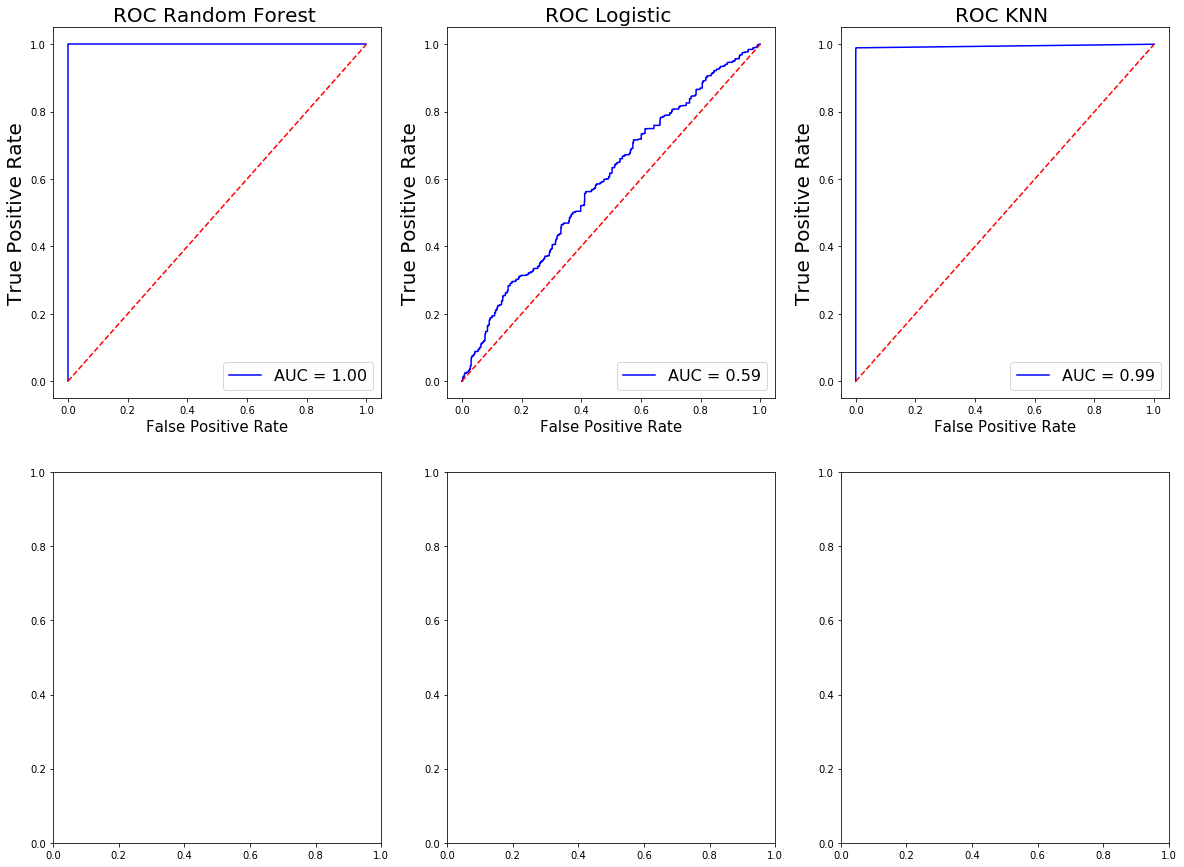

In [69]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
from sklearn import metrics

#RandomForest
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Random Forest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#LOGREG
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Logistic ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn_class.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})
